In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from mlflow.tracking import MlflowClient
from mlflow.entities import Metric

In [19]:
plt.style.use("~/nice.mplstyle")

In [13]:
bed = {
    bs: {
        es: 
        for es in [2, 4]
    }
    for bs in [4, 8, 16]
}

In [25]:
tloss_step = {}
vloss_step = {}
tloss_epoch = {}
vloss_epoch = {}
for bs, bb in bed.items():
    tloss_step[bs] = {}
    vloss_step[bs] = {}
    tloss_epoch[bs] = {}
    vloss_epoch[bs] = {}
    for es, xx in bb.items():
        logdir = f"/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/batch-ensemble/bs{bs:02d}es{es:02d}/logs/mlflow"
        name = [x for x in os.listdir(xx) if "trash" not in x][0]
        client = MlflowClient(tracking_uri=f"file://{logdir}")
        runs = client.search_runs(experiment_ids=[name])
        tloss_step[bs][es] = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "train_multi_dataset_loss_step")])
        vloss_step[bs][es] = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "val_multi_dataset_loss_step")])
        tloss_epoch[bs][es] = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "train_multi_dataset_loss_epoch")])
        vloss_epoch[bs][es] = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "val_multi_dataset_loss_epoch")])

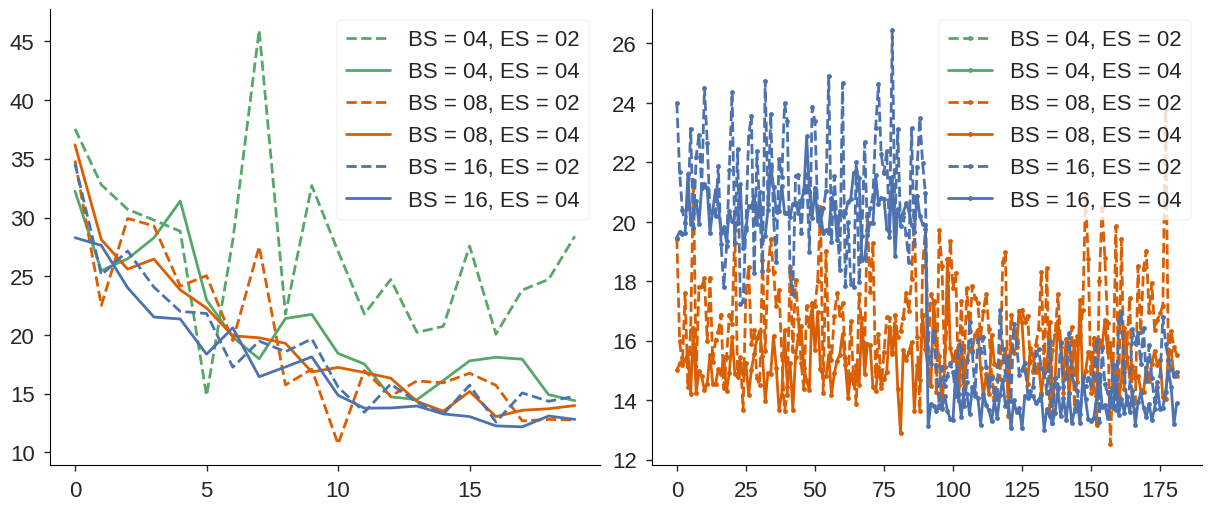

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

for i, bs in enumerate([4, 8, 16]):
    for es, ls in zip([2, 4], ["--", "-"]):
        axs[0].plot(tloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", ls=ls, color=f"C{i}")
        axs[1].plot(vloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", marker=".", ls=ls, color=f"C{i}")


[ax.legend() for ax in axs]

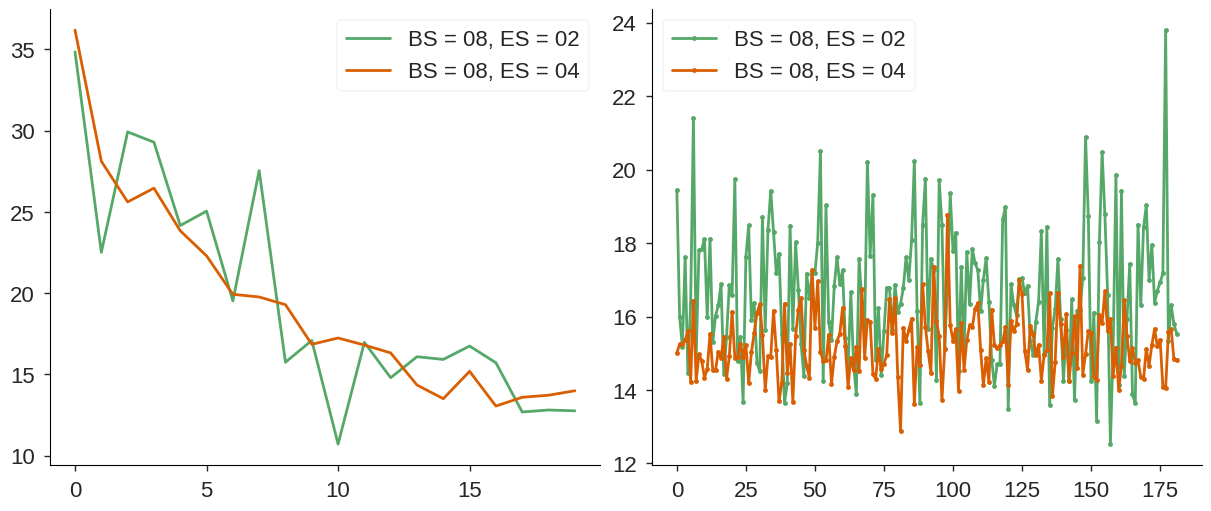

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

bs = 8
for es in [2, 4]:
    axs[0].plot(tloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}")
    axs[1].plot(vloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", marker=".")


[ax.legend() for ax in axs]

In [33]:
vloss_epoch[4][4]

array([], dtype=float64)

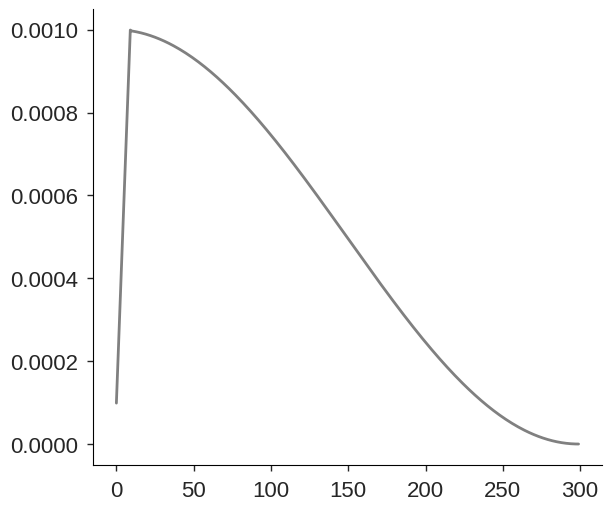

In [36]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)
ax.plot(np.arange(len(lr)), lr, color="gray")
fig.savefig("learning_rate.jpeg", dpi=300, bbox_inches="tight")

In [ ]:
kkk

In [20]:
np.argmin(vloss)

142

In [27]:
vloss[140:144]

array([0.01936564, 0.01942074, 0.01931109, 0.01940062])

In [28]:
vloss[-1]

0.020118797197937965

In [26]:
vloss[142]

0.0193110890686512

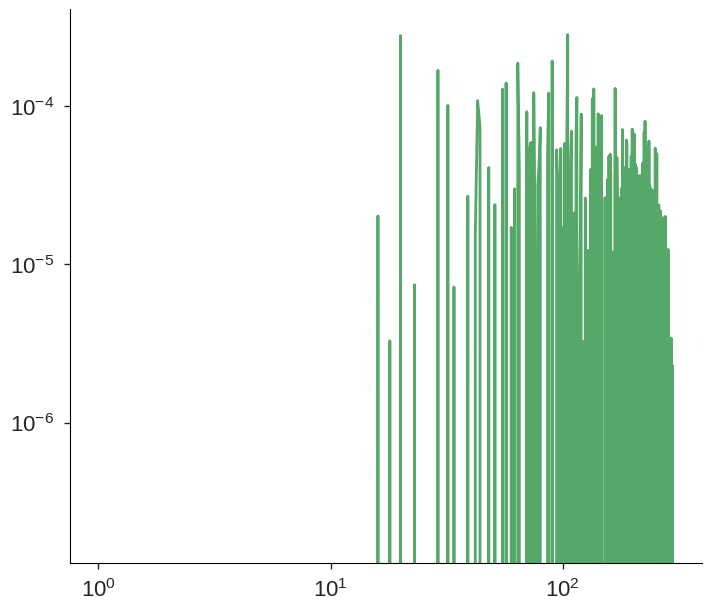

In [19]:
plt.loglog(np.diff(vloss))